# 《统计学习方法（第二版）》 第一章代码

## 参考内容
https://github.com/fengdu78/lihang-code

本代码参考了上述github代码，该代码内容非常详细，在此基础上，我又做了一些修改，并添加了较为详细的注释，做了更多观察性的实验

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

In [2]:
# 设置随机数种子，使得代码可复现
np.random.seed(42)

In [3]:
def real_func(x:np.array) -> np.array:
    """ 真实分布。 这里真实的映射我们取正弦函数 f(x) = sin(2*pi*x)。
    :param x: 横坐标值
    :return: 对应纵坐标值
    """
    return np.sin(2*np.pi*x)

In [4]:
def fit_func(p:np.array, x:np.array) -> np.array:
    """ 多项式函数
    :param p: 多项式系数向量。 如p=[1,2,3]，则表示的是 f(x) = 1*x^2 + 2*x^1 + 3*x^0
    :param x: 横坐标
    :return: 返回f(x)的值
    """
    f = np.poly1d(p)
    return f(x)

In [5]:
def residuals_fun(p:np.array, x:np.array, y:np.array, regularization = 0) -> np.array:
    """ 加入了正则项的残差
    :param p: 多项式系数向量
    :param x: 横坐标
    :param y: 真实的纵坐标
    :return: 返回带正则项的残差，注意不是平方
    """
    res = fit_func(p, x) - y
    
    #这里使用append，是因为损失函数最终计算会变成残差中每一项的平方和，而append进去正则化项，最终在损失函数中体现为加法
    res = np.append(res, np.sqrt(0.5 * regularization * np.square(p)))    
    return res

In [6]:
# 随机取0到1之间的10个点，纵坐标加入随机扰动
x = np.linspace(0,1,10)
x_points = np.linspace(0,1,1000)
y = [np.random.normal(0,0.1) + _x for _x in real_func(x)]

In [7]:
def fitting(M:int = 0, regularization:float = 0.) -> np.array:
    """ 计算多项式系数，并画出曲线
    :param M: 多项式次数
    :param regularuzation: 正则项系数，默认为0，相当于不采取正则化
    :return: 多项式系数
    """
    p_init = np.random.rand(M+1)
    p_lsq = leastsq(residuals_fun, p_init, args=(x,y,regularization))    #使用最小二乘法，计算参数p的值
    print('Fitting Parameters:', p_lsq[0])
    print('Loss:', np.sum(np.square(residuals_fun(p_lsq[0], x, y))))    #打印一下损失函数，这里没有带正则项
#     print('Loss with Regularization:', np.sum(np.square(residuals_fun(p_lsq[0], x, y, regularization))))
    
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

## 不带正则项的情况
可以看到，不带正则项时，当多项式次数较高时，损失函数非常低（几乎已经是0了），拟合曲线存在明显的过拟合现象

Fitting Parameters: [0.04480611]
Loss: 4.55630854978095


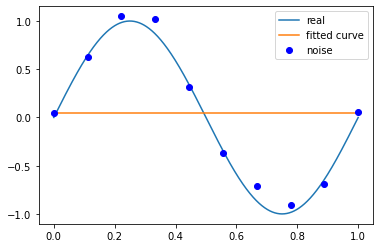

In [8]:
_ = fitting(M = 0)

Fitting Parameters: [-1.35497198  0.7222921 ]
Loss: 2.686360435258348


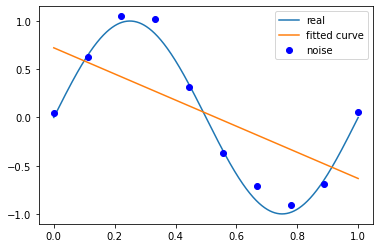

In [9]:
_ = fitting(M = 1)

Fitting Parameters: [ 2.10854334e+01 -3.17456162e+01  1.07629691e+01 -2.39894535e-02]
Loss: 0.10120669698031552


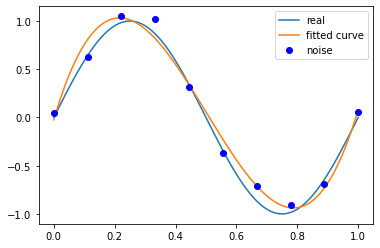

In [10]:
_ = fitting(M = 3)

Fitting Parameters: [-4.96872656e+01  1.25068647e+02 -8.89869348e+01  7.65380218e+00
  5.95356277e+00  3.20979262e-02]
Loss: 0.045701811719010686


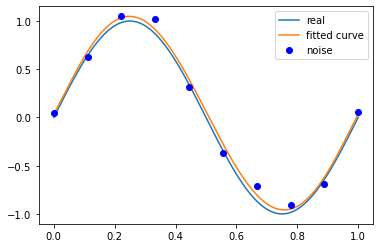

In [11]:
_ = fitting(M = 5)

Fitting Parameters: [ 2.44743281e+02 -4.29477457e+03  1.49803927e+04 -2.32765650e+04
  1.92344018e+04 -8.78287513e+03  2.13834246e+03 -2.60953069e+02
  1.72922115e+01  4.96714153e-02]
Loss: 2.744938639163595e-24


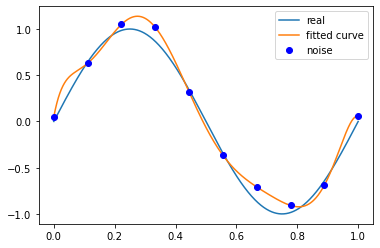

In [12]:
# 很好的拟合训练数据，损失函数很小（接近0），存在明显过拟合
_ = fitting(M = 9)

## 带正则项的情况，正则项系数为0.00001
加入正则项能有效避免过拟合，提高模型的泛化能力

Fitting Parameters: [0.04480608]
Loss: 4.55630854978096


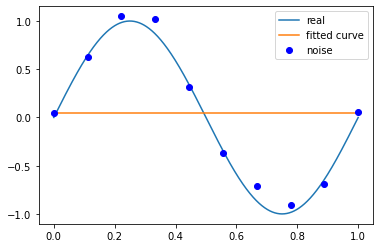

In [13]:
_ = fitting(M = 0, regularization=0.00001)

Fitting Parameters: [-1.35496355  0.72228753]
Loss: 2.6863604353319293


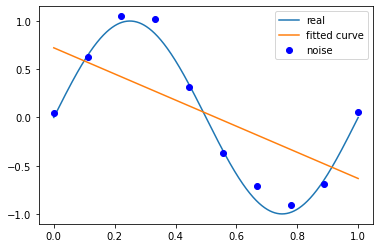

In [14]:
_ = fitting(M = 1, regularization=0.00001)

Fitting Parameters: [ 2.10212610e+01 -3.16467248e+01  1.07237609e+01 -2.13547689e-02]
Loss: 0.1012311923389765


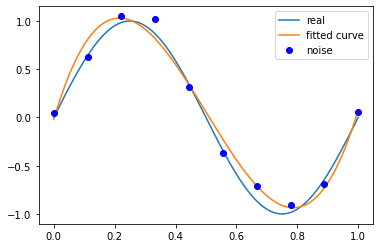

In [15]:
_ = fitting(M = 3, regularization=0.00001)

Fitting Parameters: [-1.71085527e+01  4.29541279e+01 -1.66087965e+01 -1.82943194e+01
  9.12456074e+00 -4.65069459e-03]
Loss: 0.06961689774298126


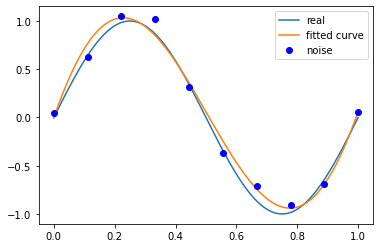

In [16]:
_ = fitting(M = 5, regularization=0.00001)

Fitting Parameters: [ 1.39068912e+01 -1.46486219e+01 -1.74665377e+01  1.35940024e+00
  2.44548961e+01  2.04433973e+01 -2.53697712e+01 -1.05639579e+01
  7.92081761e+00  1.08744246e-02]
Loss: 0.049509947068302716


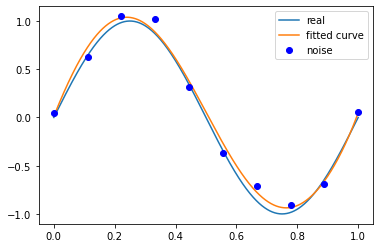

In [17]:
# 虽然损失函数比不带正则时候高（注意这里损失函数不包括正则项）， 但是有效避免了过拟合
_ = fitting(M = 9, regularization=0.00001)

Fitting Parameters: [-1.32990886e+03  3.92487530e+03 -2.98552031e+03 -1.92754567e+03
  4.26653350e+03 -2.50882852e+03  6.24763713e+02 -7.26844823e+01
  8.31896781e+00  5.10288718e-02]
Loss: 0.0016865096467921178


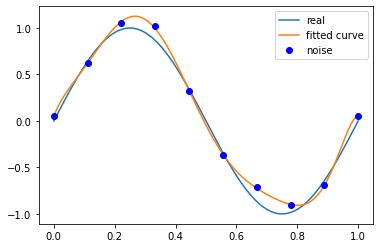

In [18]:
# 正则化项越小，泛化能力越差
_ = fitting(M = 9, regularization=0.0000000001)

Fitting Parameters: [ 0.98991986  0.87129014  0.68440763  0.39812234 -0.0263675  -0.61945052
 -1.3287448  -1.72469725  0.13552446  0.6272448 ]
Loss: 1.1315808204103739


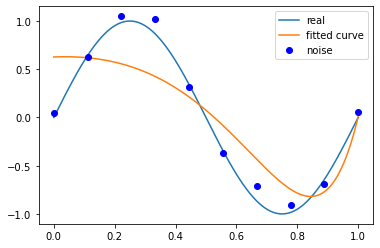

In [19]:
# 正则化项过大，泛化能力过强，也会导致模型性能下降
_ = fitting(M = 9, regularization=0.1)

综上，在选取正则化项时，要慎重选择，太小起不到正则化的作用，太大又会导致模型对数据的拟合能力大大下降